### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
OZ project Project<br>
-- Q_1p Cross Sections Examples
</H1>

<b>This notebook will fit impact ionisation cross sections for</b> 
    
 > - <b>H + p = p + p + e</b> <br>
 > I only have data from 1.25 -- 1500 keV. This is probably OK as the CX process is weak at greater energies. Still, is it possible to fit a fn to what we have so far, and then extend the decay linearly (in log space) to higher energies? Could fit a straight line in log space (simple exponential decay) from say 500-->1500 keV and then extrapolate further. Fitting a 1 degree polynomial in logE - log Q space seems to work well.

> - <b>H + H = p + H + e</b> <br>
> Taken from the recommended data in Cariatore & Schultz 2021, ranging 1e-2 --> 1e4 keV. Their data comes from various sources. I fit X-degree polynomials and Chebyshev fns in log space. 
 
 
> - <b>H + e = p + H + e</b><br>
> Taken from Janev et al 1993 IAEA atomic data tables. They provide fits, so here I just use their results and plot to make sure they extend to higher energies in a sensible way. I tried my own fits here, but their fit works
well already. 
 
 

---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [597]:
##
## Import some modules
##

import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
sys.path.insert(0,'/Users/gskerr1/Documents/Research/OrrallZirkerEffect/')


import radynpy
import OrrallZirkerPy as OZpy
# from OrrallZirkerPy import CrossSections
from OrrallZirkerPy.CrossSections import chebyshev_fn as Cheb
from numpy.polynomial.polynomial import Polynomial as Poly



import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import pandas as pd

import cmocean
import colorcet as ccet
import palettable as pal 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [685]:
import importlib
importlib.reload(OZpy.CrossSections)



<module 'OrrallZirkerPy.CrossSections' from '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/OrrallZirkerPy/CrossSections.py'>

***Set up plot properties***

In [599]:
##
## Plot properties (these are just personal preference)
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 22,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': False,
               'xtick.top': False,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': False,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': False,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6





template = dict(
        layout = go.Layout(font = dict(family = "Rockwell", size = 18),
                           title_font = dict(family = "Rockwell", size = 22), 
                           plot_bgcolor = 'white',
                           paper_bgcolor = 'white',
                           xaxis = dict(
                                showexponent = 'all',
                                exponentformat = 'e',
                                tickangle = 0,
                                linewidth = 4,
                                showgrid = True,
                            ),
                            yaxis = dict(
                          showexponent = 'all',
                          exponentformat = 'e',
                                linewidth = 4,
                                showgrid = True,
                                anchor = 'free',
                                position = 0,
                                domain = [0.0,1]
                            ),
                            coloraxis_colorbar = dict(
                                thickness = 15,
                                tickformat = '0.2f',
                                ticks = 'outside',
                                titleside = 'right'
                            )
                            ))

---
### <b style="color:blue"> Calculate or extract the cross sections </b>

***Set up the CrossSec object with requested energy values***

In [605]:
energy = np.arange(1, 8001, 1)
cs = OZpy.CrossSections.CrossSec(energy)

***Run the various functions***

In [606]:
##
## These are the data that will be fit
##
Shah98 = OZpy.CrossSections.cs_shah98()
Shah87a = OZpy.CrossSections.cs_shah87a()
Shah81 = OZpy.CrossSections.cs_shah81()
car21 = OZpy.CrossSections.cs_cariatore21()
iaea93_Q_1pE = OZpy.CrossSections.cs_iaea93_Q_1pE()
kerr = cs.cs_kerr_poly()




***Combine the data for Q_1pP***
> - We are stiching together the Shah data points:
>> Shah 1998 1.25 -> 9 keV <br>
Shah 1987a 9.4 -> 75 keV <br>
Shah 1981 80 keV -> 1500 keV <br>



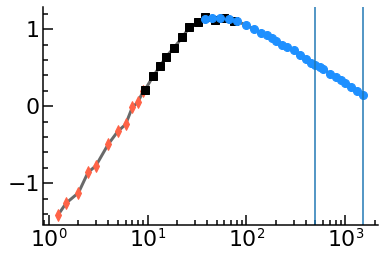

In [617]:
e1_P = 1.25
e2_P = 9.00
e3_P = 9.40
e4_P = 75.00
e5_P = 80.00
e6_P = 1500.0
eind1 = np.abs(Shah98.energy - e1_P).argmin()
eind2 = np.abs(Shah98.energy - e2_P).argmin()
eind3 = np.abs(Shah87a.energy - e3_P).argmin()
eind4 = np.abs(Shah87a.energy - e4_P).argmin()
eind5 = np.abs(Shah81.energy - e5_P).argmin()
eind6 = np.abs(Shah81.energy - e6_P).argmin()
energy_tot = np.concatenate((Shah98.energy[eind1:eind2+1], 
                             Shah87a.energy[eind3:eind4+1],
                             Shah81.energy[eind5:eind6+1] ))

csec_tot_Q1pP = np.concatenate((
                  Shah98.Q_1pP[eind1:eind2+1],
                  Shah87a.Q_1pP[eind3:eind4+1],
                  Shah81.Q_1pP[eind5:eind6+1]))

##
## Plot the Q_1pP cross sections data as a sanity check
## The vertical lines are where we will fit a linear fn in log-log for the decay.
##
plt.plot(energy_tot, np.log10(csec_tot_Q1pP),linewidth = 3, color = 'dimgrey')
plt.xscale('log')
plt.plot(Shah98.energy, np.log10(Shah98.Q_1pP), linestyle = 'none', marker = 'd', markersize = 8, color = 'tomato')
plt.plot(Shah87a.energy, np.log10(Shah87a.Q_1pP),linestyle = 'none', marker = 's', markersize = 8, color = 'black')
plt.plot(Shah81.energy, np.log10(Shah81.Q_1pP), linestyle = 'none', marker = 'o', markersize = 8, color = 'dodgerblue')

plt.axvline(x=500)
plt.axvline(x=1500)

***Extract relevant data for Q_1pH***
> - Lets only fit from 1+ keV up:



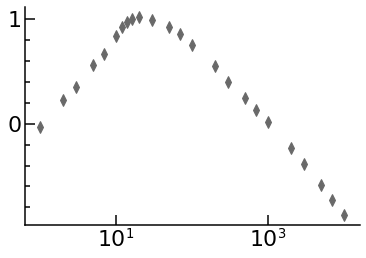

In [615]:
##
## Plot the Q_1pH cross sections as a sanity check
##
e1_H = 1.00
e2_H = 1e4
eind_car1 = np.abs(car21.energy - e1_H).argmin()
eind_car2 = np.abs(car21.energy - e2_H).argmin()

car21.energy = car21.energy[eind_car1:eind_car2+1]
car21.Q_1pH = car21.Q_1pH[eind_car1:eind_car2+1]

##
## Plot the Q_1pH cross sections data as a sanity check
## The vertical lines are where we will fit a linear fn in log-log for the decay.
##
plt.plot(car21.energy, np.log10(car21.Q_1pH), marker = 'd', linestyle = 'none', markersize = 8, color = 'dimgrey')
plt.xscale('log')

---
### <b style="color:blue"> Do the fits </b>

***Fit the various cross sections***

> - Q_1pP


In [616]:
##
## Set up the fits
##
cfit_Q1pP_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q1pP, emin = e1_P, emax = e6_P, deg = 4)
cfit_Q1pP_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q1pP, emin = e1_P, emax = e6_P, deg = 5)
cfit_Q1pP_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q1pP, emin = e1_P, emax = e6_P, deg = 6)
cfit_Q1pP_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q1pP, emin = e1_P, emax = e6_P, deg = 7)
cfit_Q1pP_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(energy_tot, 
                                                          csec_tot_Q1pP, emin = e1_P, emax = e6_P, deg = 8)

pfit_Q1pP_4deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q1pP,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q1pP_5deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q1pP,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q1pP_6deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q1pP,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q1pP_7deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q1pP,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q1pP_8deg = OZpy.CrossSections.cs_polyfit(energy_tot, csec_tot_Q1pP,  
                                                       order = 8, log10E = True, log10Q = True)

In [618]:
##
## Do the straight line fit to the high energy range
##
ehigh_P = 1500
elow_P = 500
estart = np.abs(energy_tot - elow_P).argmin()
eend = np.abs(energy_tot - ehigh_P).argmin()
energy2fit = energy_tot[estart:eend+1]
csec2fit = csec_tot_Q1pP[estart:eend+1]

pfit_Q1pP_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q1pP_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)




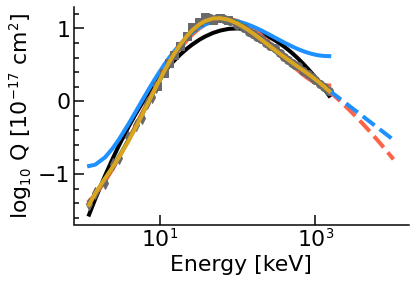

In [627]:
##
## Plot the Q_1pP results (cheb)
## 

plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q1pP_4deg, len(cfit_Q1pP_4deg)-1, e1_P, e6_P)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q1pP_5deg, len(cfit_Q1pP_5deg)-1, e1_P, e6_P)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q1pP_6deg, len(cfit_Q1pP_6deg)-1, e1_P, e6_P)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q1pP_7deg, len(cfit_Q1pP_7deg)-1, e1_P, e6_P)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (np.log10(np.exp(Cheb(energy_tot, cfit_Q1pP_8deg, len(cfit_Q1pP_8deg)-1, e1_P, e6_P)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(Shah98.energy, np.log10(Shah98.Q_1pP), marker = 'd', markersize = 8, color = 'dimgrey')
plt.plot(Shah87a.energy, np.log10(Shah87a.Q_1pP), marker = 's', markersize = 8, color = 'dimgrey')
plt.plot(Shah81.energy, np.log10(Shah81.Q_1pP), marker = 'o', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(1500, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q1pP_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pP_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')





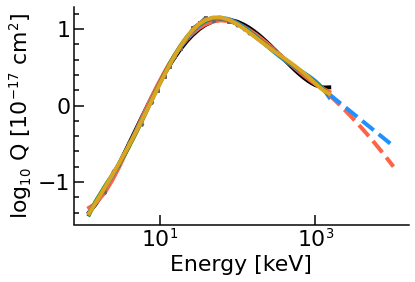

In [628]:
##
## Plot the Q_1pP results (poly)
##

plt.plot((energy_tot), 
                   (pfit_Q1pP_4deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy_tot), 
                   (pfit_Q1pP_5deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy_tot), 
                   (pfit_Q1pP_6deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy_tot), 
                   (pfit_Q1pP_7deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy_tot), 
                   (pfit_Q1pP_8deg(np.log10(energy_tot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',zorder = 50
                 )
plt.plot(Shah98.energy, np.log10(Shah98.Q_1pP), marker = 'd', markersize = 3, color = 'dimgrey')
plt.plot(Shah87a.energy, np.log10(Shah87a.Q_1pP), marker = 's', markersize = 3, color = 'dimgrey')
plt.plot(Shah81.energy, np.log10(Shah81.Q_1pP), marker = 'o', markersize = 3, color = 'dimgrey')

energy2plot = np.arange(1500, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q1pP_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pP_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_1pP),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_1pP),linewidth=2, color = 'red')




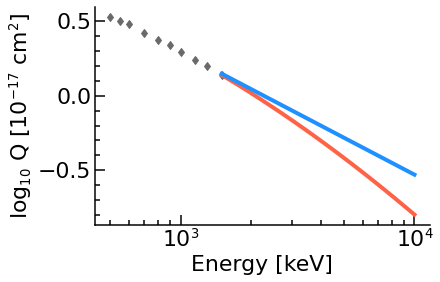

In [636]:
##
## A closer Look at the high energy extrapolation 
##

plt.plot(energy2fit,np.log10(csec2fit), marker = 'd', color = 'dimgrey', linestyle = 'none')

energy2plot = np.arange(1500, 10001,1)
plt.plot((energy2plot), 
                   (pfit_Q1pP_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pP_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')



(500.0, 8000.0)

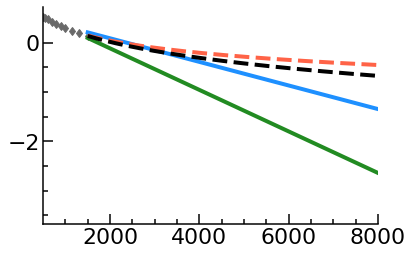

In [639]:
# ##
# ## A closer Look at the high energy extrapolation 
# ##

# plt.plot(energy2fit,np.log10(csec2fit), marker = 'd', color = 'dimgrey', linestyle = 'none')


# plt.plot((energy2plot), 
#                   np.log10(OZpy.CrossSections.exponential_fn(energy2plot,popt_exp[0],popt_exp[1])),
#                    linewidth = 4, linestyle = '-', color = 'forestgreen',
#                  )
# plt.plot((energy2plot), 
#                   np.log10(OZpy.CrossSections.hyperbolic_fn(energy2plot,popt_hyp[0],popt_hyp[1], popt_hyp[2])),
#                    linewidth = 4, linestyle = '-', color = 'dodgerblue',
#                  )
# plt.plot((energy2plot), 
#                    (pfit_Q1pP_1deg_end(np.log10(energy2plot))),
#                    linewidth = 4, linestyle = '--', color = 'tomato',
#                  )
# plt.plot((energy2plot), 
#                    (pfit_Q1pP_2deg_end(np.log10(energy2plot))),
#                    linewidth = 4, linestyle = '--', color = 'black',
#                  )

# plt.xlim([500,8000])
# # plt.ylim([-0.2, 0.2])

> - Q_1pH

In [640]:
##
## Set up the fits
##
cfit_Q1pH_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(car21.energy, 
                                                          car21.Q_1pH, emin = e1_H, emax = e2_H, deg = 4)
cfit_Q1pH_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(car21.energy, 
                                                          car21.Q_1pH, emin = e1_H, emax = e2_H, deg = 5)
cfit_Q1pH_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(car21.energy, 
                                                          car21.Q_1pH, emin = e1_H, emax = e2_H, deg = 6)
cfit_Q1pH_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(car21.energy, 
                                                          car21.Q_1pH, emin = e1_H, emax = e2_H, deg = 7)
cfit_Q1pH_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(car21.energy, 
                                                          car21.Q_1pH, emin = e1_H, emax = e2_H, deg = 8)

pfit_Q1pH_4deg = OZpy.CrossSections.cs_polyfit(car21.energy, car21.Q_1pH,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q1pH_5deg = OZpy.CrossSections.cs_polyfit(car21.energy, car21.Q_1pH,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q1pH_6deg = OZpy.CrossSections.cs_polyfit(car21.energy, car21.Q_1pH,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q1pH_7deg = OZpy.CrossSections.cs_polyfit(car21.energy, car21.Q_1pH,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q1pH_8deg = OZpy.CrossSections.cs_polyfit(car21.energy, car21.Q_1pH,  
                                                       order = 8, log10E = True, log10Q = True)

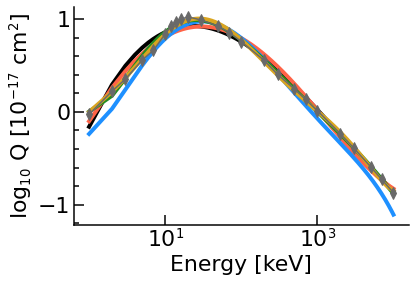

In [641]:
##
## Plot the Q_1pH results (cheb)
## 

energy2plot = np.arange(1, 10001, 1)
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q1pH_4deg, len(cfit_Q1pH_4deg)-1, e1_H, e2_H)))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q1pH_5deg, len(cfit_Q1pH_5deg)-1, e1_H, e2_H)))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q1pH_6deg, len(cfit_Q1pH_6deg)-1, e1_H, e2_H)))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q1pH_7deg, len(cfit_Q1pH_7deg)-1, e1_H, e2_H)))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q1pH_8deg, len(cfit_Q1pH_8deg)-1, e1_H, e2_H)))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod',
                 )
plt.plot(car21.energy, np.log10(car21.Q_1pH), marker = 'd', markersize = 8, color = 'dimgrey')


plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')






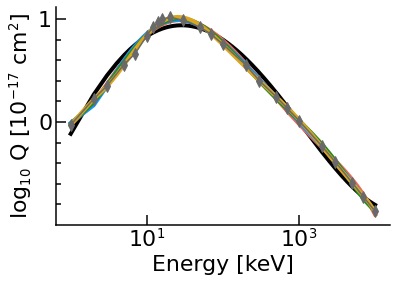

In [650]:
##
## Plot the Q_1pH results (poly)
##
energy2plot = np.arange(1, 10001, 1)
plt.plot((energy2plot), 
                   (pfit_Q1pH_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pH_5deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pH_6deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pH_7deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pH_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod'
                 )
plt.plot(car21.energy, np.log10(car21.Q_1pH), marker = 'd', markersize = 8, color = 'dimgrey')

    
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')



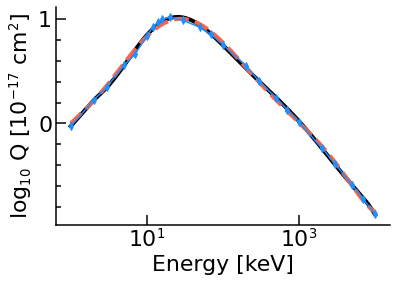

In [739]:
## 
## Compare the polynomial to chebyshev fit 
##

energy2plot = np.arange(1, 10001, 1)


plt.plot((energy2plot), 
                   (pfit_Q1pH_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black'
                 )
plt.plot((energy2plot), 
                   (np.log10(np.exp(Cheb(energy2plot, cfit_Q1pH_8deg, len(cfit_Q1pH_8deg)-1, e1_H, e2_H)))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot(car21.energy, np.log10(car21.Q_1pH), marker = 'd', markersize = 5, color = 'dodgerblue')
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')






> - Q_1pE



In [737]:
e1_E = 1.5e1/1e3
e2_E = 1e4/1e3

cfit_Q1pE_4deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93.energy, 
                                                          iaea93.Q_1pE, emin = e1_E, emax = e2_E, deg = 4)
cfit_Q1pE_5deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93.energy, 
                                                          iaea93.Q_1pE, emin = e1_E, emax = e2_E, deg = 5)
cfit_Q1pE_6deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93.energy, 
                                                          iaea93.Q_1pE, emin = e1_E, emax = e2_E, deg = 6)
cfit_Q1pE_7deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93.energy, 
                                                          iaea93.Q_1pE, emin = e1_E, emax = e2_E, deg = 7)
cfit_Q1pE_8deg, pcov_cheb = OZpy.CrossSections.cs_chebfit(iaea93.energy, 
                                                          iaea93.Q_1pE, emin = e1_E, emax = e2_E, deg = 8)

pfit_Q1pE_4deg = OZpy.CrossSections.cs_polyfit(iaea93.energy, iaea93.Q_1pE,  
                                                       order = 4, log10E = True, log10Q = True)
pfit_Q1pE_5deg = OZpy.CrossSections.cs_polyfit(iaea93.energy, iaea93.Q_1pE,  
                                                       order = 5, log10E = True, log10Q = True)
pfit_Q1pE_6deg = OZpy.CrossSections.cs_polyfit(iaea93.energy, iaea93.Q_1pE,  
                                                       order = 6, log10E = True, log10Q = True)
pfit_Q1pE_7deg = OZpy.CrossSections.cs_polyfit(iaea93.energy, iaea93.Q_1pE,  
                                                       order = 7, log10E = True, log10Q = True)
pfit_Q1pE_8deg = OZpy.CrossSections.cs_polyfit(iaea93.energy, iaea93.Q_1pE,  
                                                       order = 8, log10E = True, log10Q = True)

In [660]:
##
## Do the straight line fit to the high energy range
##
estart = np.abs(iaea93.energy - 1).argmin()
eend = np.abs(iaea93.energy - 1e4.0).argmin()
energy2fit = iaea93.energy[estart:eend+1]
csec2fit = iaea93.Q_1pE[estart:eend+1]

pfit_Q1pE_2deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 2, log10E = True, log10Q = True)
pfit_Q1pE_1deg_end = OZpy.CrossSections.cs_polyfit(energy2fit, csec2fit,  
                                                       order = 1, log10E = True, log10Q = True)



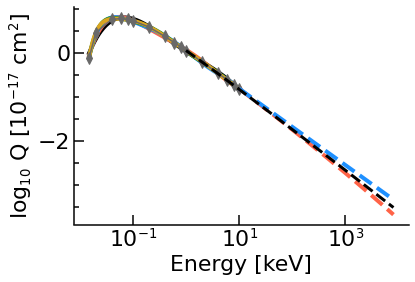

In [665]:
##
## Plot the Q_1pE results (poly)
##
energy2plot = np.arange(1.5e1, 1e4, 1)/1e3
plt.plot((energy2plot), 
                   (pfit_Q1pE_4deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'black',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pE_5deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pE_6deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'dodgerblue',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pE_7deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'forestgreen',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pE_8deg(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '-', color = 'goldenrod'
                 )
plt.plot(iaea93.energy, np.log10(iaea93.Q_1pE), marker = 'd', markersize = 8, color = 'dimgrey')

energy2plot = np.arange(10, 8001,1)
plt.plot((energy2plot), 
                   (pfit_Q1pE_2deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'tomato',
                 )
plt.plot((energy2plot), 
                   (pfit_Q1pE_1deg_end(np.log10(energy2plot))),
                   linewidth = 4, linestyle = '--', color = 'dodgerblue',
                 )

plt.plot(energy, np.log10(kerr.Q_1pE), color = 'black', linestyle = '--', linewidth = 3)

# plt.xlim([5,20])
# plt.ylim([-1,0])
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')


# plt.plot(energy, np.log10(kerr.Q_1pP),linewidth=2, color = 'forestgreen')
# plt.plot(energy, np.log10(kerr_ch.Q_1pP),linewidth=2, color = 'red')




In [678]:
pfit_Q1pE_1deg_end.coef

array([ 0.06223376, -0.87223181])

---
### <b style="color:blue"> Do the fits work? </b>

***Compare to other values cross sections***

In [707]:
# energy = np.arange(1.5e1/1e3, 100, 1e-3)
energy = np.arange(1, 8001, 1)
cs = OZpy.CrossSections.CrossSec(energy)

f95 = cs.cs_fang95()
bw99 = cs.cs_bw99()
kerr = cs.cs_kerr_poly()
kerr_ch = cs.cs_kerr_cheb()


> - Q_1pP

<ipython-input-689-c328b36676b5>:4: RuntimeWarning: invalid value encountered in log10
  plt.plot(energy, np.log10(f95.Q_1pP), color = 'dodgerblue')


(-1.0, 1.5)

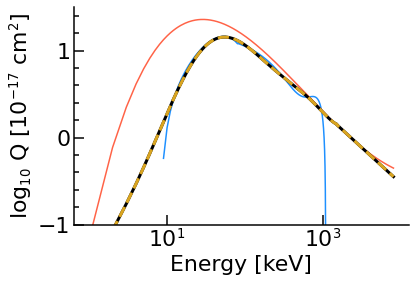

In [689]:
##
## Compare Fang et al 1995, Brosius & Woodgate 1999, and my fits
##
plt.plot(energy, np.log10(f95.Q_1pP), color = 'dodgerblue')
plt.plot(energy, np.log10(bw99.Q_1pP), color = 'tomato')
plt.plot(energy, np.log10(kerr.Q_1pP), color = 'black', linewidth = 3)
plt.plot(energy, np.log10(kerr_ch.Q_1pP), color = 'goldenrod', linestyle = '--', linewidth = 3)

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
plt.ylim([-1, 1.5])

> - Q_1pH

(-1.0, 1.5)

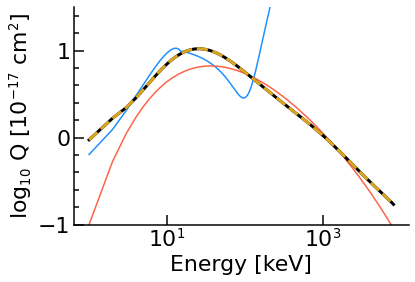

In [692]:
##
## Compare Fang et al 1995, Brosius & Woodgate 1999, and my fits
##
plt.plot(energy, np.log10(f95.Q_1pH), color = 'dodgerblue')
plt.plot(energy, np.log10(bw99.Q_1pH), color = 'tomato')
plt.plot(energy, np.log10(kerr.Q_1pH), color = 'black', linewidth = 3)
plt.plot(energy, np.log10(kerr_ch.Q_1pH), color = 'goldenrod', linestyle = '--', linewidth = 3)

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')
plt.ylim([-1, 1.5])


> - Q_1pE

<ipython-input-717-be0b9dea554e>:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(energy, np.log10(bw99.Q_1pE), color = 'tomato')


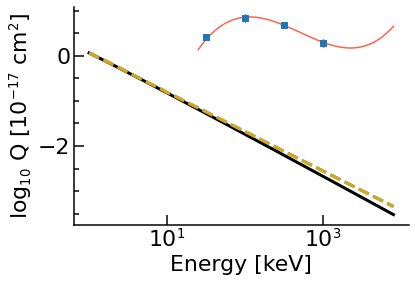

In [717]:
##
## Compare Fang et al 1995, Brosius & Woodgate 1999, and my fits.
## Inlude the data points from Canfield and Chang, and Orral & Zirker
##
plt.plot(energy, np.log10(bw99.Q_1pE), color = 'tomato')
# plt.plot(energy, np.log10(f95.Q_1pE), color = 'dodgerblue')
plt.plot(energy, np.log10(kerr.Q_1pE), color = 'black', linewidth = 3)
plt.plot(energy, np.log10(kerr.Q_1pE_alt), color = 'forestgreen', linewidth = 3, linestyle = '--')
plt.plot(energy, np.log10(kerr_ch.Q_1pE_alt), color = 'goldenrod', linewidth = 3, linestyle = '--')

plt.plot([1000,100], np.log10([1.9,7.0]), marker = 'd', linestyle = 'none', color = 'dodgerblue')
plt.plot([31.6, 100, 316, 1000], np.log10([2.6, 7.0, 4.8, 1.9]), marker = 's', linestyle = 'none')

# plt.ylim([-5,1.5])
plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')

> - Compare the three cross sections to compare magnitudes

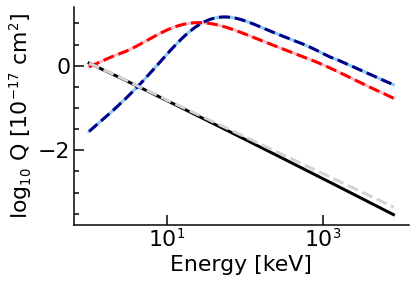

In [729]:
plt.plot(energy, np.log10(kerr.Q_1pP), color = 'skyblue', linewidth = 3)
plt.plot(energy, np.log10(kerr.Q_1pH), color = 'pink', linewidth = 3)
plt.plot(energy, np.log10(kerr.Q_1pE), color = 'black', linewidth = 3)

plt.plot(energy, np.log10(kerr.Q_1pP), color = 'darkblue', linewidth = 3, linestyle = '--')
plt.plot(energy, np.log10(kerr_ch.Q_1pH), color = 'red', linestyle = '--', linewidth = 3)
plt.plot(energy, np.log10(kerr.Q_1pE_alt), color = 'lightgrey', linewidth = 3, linestyle = '--')

plt.xlabel('Energy [keV]')
plt.ylabel('log$_{10}$ Q [10$^{-17}$ cm$^{2}$]')
plt.xscale('log')



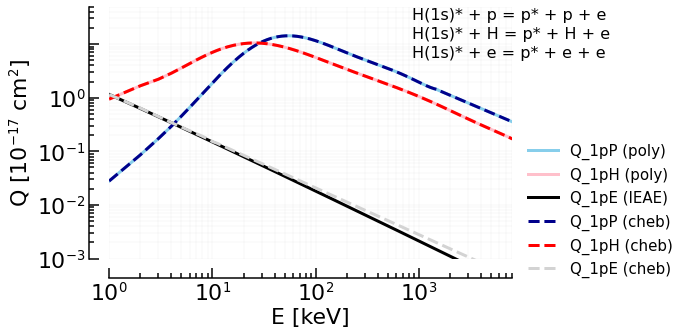

In [740]:
savepng = True
fname_out = 'MyFits_Q_1p_all'
dir1 = './'

logy = True
logx = True

csid1 = 'H(1s)* + p = p* + p + e'
csid2 = 'H(1s)* + H = p* + H + e'
csid3 = 'H(1s)* + e = p* + e + e'


xrange = [1, 8000]
yrange = [1e-3, 50]
cmaptemp = pal.cartocolors.sequential.Sunset_5.get_mpl_colormap()
colors = cmaptemp(np.linspace(0.1,1.0,5))


labels = ['Q_1pP (poly)', 'Q_1pH (poly)', 'Q_1pE (IEAE)', 'Q_1pP (cheb)', 'Q_1pH (cheb)', 'Q_1pE (cheb)']

if logx == True:
    xtitle = 'E [keV]'
elif logy == False:
    xtitle = 'E [keV]'
if logy == True:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
elif logy == False:
    ytitle = 'Q [10$^{-17}$ cm$^{2}$]'
    
xsize = 8
ysize = 5
fig = plt.figure(figsize=(xsize, ysize))

x1 = 0.075
y1 = 0.075
dx = 0.70
sx = 0.05
dy = 0.70
sy = 0.05

ax1 = fig.add_axes([x1, y1, dx, dy])

ax1.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labeltop = False,
    left=True,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelright=False,
    labelleft = True
    ) 

ax1.spines["left"].set_position(("axes",-0.05))
ax1.spines["bottom"].set_position(("axes",-.075))
ax1.grid(True, axis='x', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)
ax1.grid(True, axis='y', which='both', linestyle = '-', linewidth = 0.25, color = 'grey', alpha = 0.25)

ax1.set_ylim(yrange[0],yrange[-1])
ax1.set_xlim(xrange[0],xrange[-1])
ax1.set_ylabel(ytitle)
ax1.set_xlabel(xtitle)


ax1.text(0.75, 0.95, csid1, color = 'black',transform=ax1.transAxes,fontsize = 16)   
ax1.text(0.75, 0.875, csid2, color = 'black',transform=ax1.transAxes,fontsize = 16)     
ax1.text(0.75, 0.80, csid3, color = 'black',transform=ax1.transAxes,fontsize = 16)     


# ax1.text(0.025, 0.80, 't = %0.2fs' %(timer[snap]), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.70, r'$\tau_{exp}$ = %0.2fs' %(exptime), color = 'black',transform=ax1.transAxes,fontsize = 16)     
# ax1.text(0.025, 0.60, '$\lambda_{0}$ = %0.2f$\mathrm{\AA}$'%(lambda_rest), color = 'black',transform=ax1.transAxes,fontsize = 16)     

if logx == True:
    ax1.set_xscale('log')
    ax1.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.xaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logx == False:
    ax1.set_xscale = 'linear'
if logy == True:
    ax1.set_yscale('log')
    ax1.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax1.yaxis.get_ticklabels()[::5]:
        label.set_visible(False) #(3)
elif logy == False:
    ax1.set_yscale = 'linear'
        
line1, = ax1.plot(energy, (kerr.Q_1pP), color = 'skyblue',
                   linewidth = 3, linestyle = '-',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'P', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[0]
                 )
line2, = ax1.plot(energy, (kerr.Q_1pH), color = 'pink',
                   linewidth = 3, linestyle = '-',
#                   zorder = 50, alpha = 1,
#                    marker = 'd', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[1]
                 )
line3, = ax1.plot(energy, (kerr.Q_1pE), color = 'black',
                   linewidth = 3, linestyle = '-',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'X', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[2]
                 )
line4, = ax1.plot(energy, (kerr_ch.Q_1pP), color = 'darkblue',
                   linewidth = 3, linestyle = '--',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'D', markeredgewidth = 1, 
#                    markersize = 5,
                   label = labels[3]
                 )
line5, = ax1.plot(energy, (kerr_ch.Q_1pH), color = 'red',
                   linewidth = 3, linestyle = '--',
#                   zorder = 0, alpha = 0.35,
#                    marker = 'o', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[4]
                 )
line6, = ax1.plot(energy, (kerr.Q_1pE_alt), color = 'lightgrey',
                   linewidth = 3, linestyle = '--',
#                   zorder = 0, alpha = 0.35,
#                    marker = 's', markeredgewidth = 1, 
#                    markersize = 8,
                   label = labels[5]
                 )




leg1 = ax1.legend(handles=[line1,line2,line3,line4,line5,line6],loc=(1.025,-0.10), fontsize = 15)

# ax1.axvline(x=16, color = 'tomato', alpha = 0.5, linestyle = ':')

if logx == True:
    appendx = '_logx'
elif logx == False:
    appendx = '_linx'
if logy == True:
    appendy = '_logy'
elif logy == False:
    appendy = '_liny'
if savepng == True:
        plt.savefig(dir1+fname_out+appendx+appendy+'.png', format='png', bbox_inches = 'tight', dpi=300)

plt.show()